<a href="https://colab.research.google.com/github/Rakib911Hossan/Al_Project/blob/dev/lab_6(ml_model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Path to your CSV
csv_path = "/content/drive/MyDrive/BUBT/data - data.csv"

# Read CSV file
df_all = pd.read_csv(csv_path)

# Show first 5 rows
print(df_all.head(5))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

     

In [14]:
# --- BASIC EDA ---
print("Shape of dataset:", df_all.shape)
print("\nColumns in dataset:\n", df_all.columns.tolist())

print("\nData types:\n", df_all.dtypes)

print("\nMissing values:\n", df_all.isnull().sum())

print("\nSummary statistics:\n", df_all.describe(include='all'))

# Check for duplicates
print("\nNumber of duplicate rows:", df_all.duplicated().sum())

# Unique values per column
for col in df_all.columns:
    print(f"\nColumn: {col}")
    print("Unique values:", df_all[col].nunique())
    print(df_all[col].unique()[:10])  # show first 10 unique


Shape of dataset: (11914, 16)

Columns in dataset:
 ['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']

Data types:
 Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

Missing values:
 Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels      

In [15]:
# 1. Remove duplicates
df_all = df_all.drop_duplicates()

# 2. Handle missing values
# Drop columns with more than 50% missing values
threshold = len(df_all) * 0.5
df_all = df_all.dropna(axis=1, thresh=threshold)

# Fill missing values (you can adjust strategy)
for col in df_all.columns:
    if df_all[col].dtype == "object":
        df_all[col] = df_all[col].fillna("Unknown")
    else:
        df_all[col] = df_all[col].fillna(df_all[col].median())

# 3. Strip whitespace from column names
df_all.columns = df_all.columns.str.strip()

# 4. Convert numeric columns
for col in df_all.columns:
    # Try converting to numeric, ignore if fails
    df_all[col] = pd.to_numeric(df_all[col], errors="ignore")

# 5. Encode categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in df_all.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df_all[col] = le.fit_transform(df_all[col].astype(str))
    label_encoders[col] = le


/tmp/ipython-input-2674417086.py:22: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_all[col] = pd.to_numeric(df_all[col], errors="ignore")


In [16]:
# Final check
print("Final dataset shape:", df_all.shape)
print("Columns:", df_all.columns.tolist())

# Save cleaned data
df_all.to_csv("/content/drive/My Drive/cleaned_dataset.csv", index=False)
print("✅ Cleaned dataset saved to Google Drive.")



Final dataset shape: (11199, 16)
Columns: ['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']
✅ Cleaned dataset saved to Google Drive.


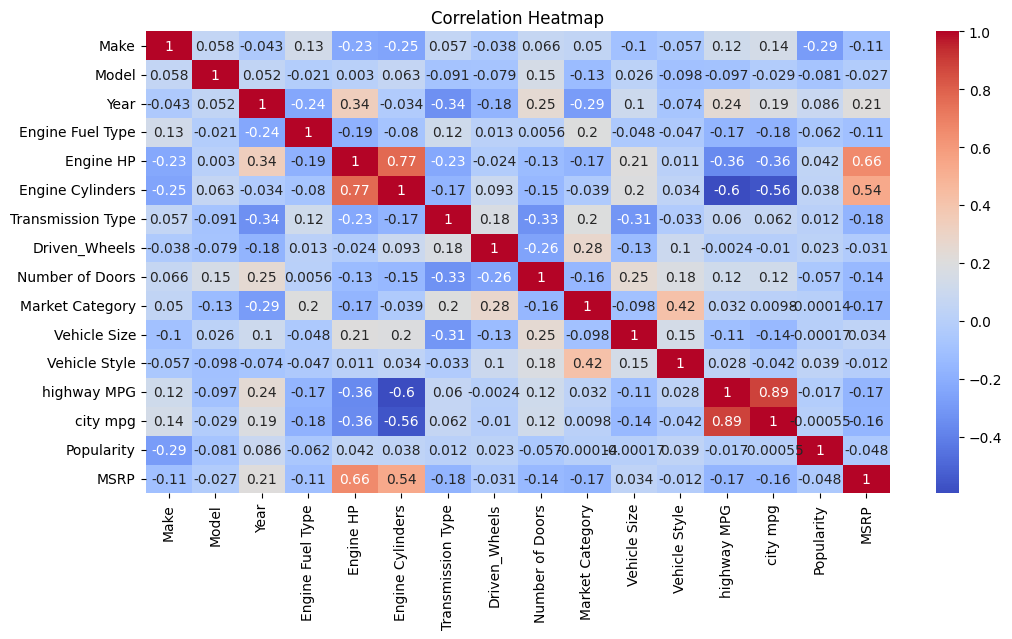

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(df_all.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [21]:
# Separate features and target
X = df_all.drop(columns=['Engine HP'])  # all columns except target
y = df_all['Engine Cylinders']

# Encode target if categorical
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)


(8959, 15) (2240, 15)


In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [26]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [27]:
y_pred = model.predict(X_test)


In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9995535714285714

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         3.0       1.00      1.00      1.00         7
         4.0       1.00      1.00      1.00       851
         5.0       1.00      1.00      1.00        28
         6.0       1.00      1.00      1.00       868
         8.0       1.00      1.00      1.00       426
        10.0       1.00      1.00      1.00        10
        12.0       0.97      1.00      0.99        37
        16.0       1.00      0.50      0.67         2

    accuracy                           1.00      2240
   macro avg       1.00      0.94      0.96      2240
weighted avg       1.00      1.00      1.00      2240


Confusion Matrix:
 [[ 11   0   0   0   0   0   0   0   0]
 [  0   7   0   0   0   0   0   0   0]
 [  0   0 851   0   0   0   0   0   0]
 [  0   0   0  28   0   0   0   0   0]
 [  0   0   0   0 868   0   0   0   0]
 [  0   0   0   0   0 426 

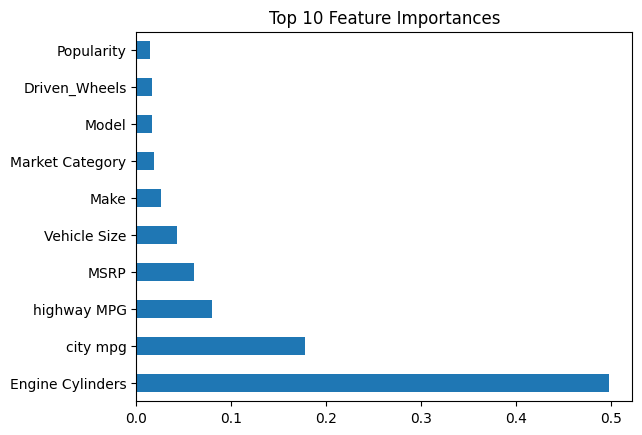

In [29]:
import matplotlib.pyplot as plt

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()

